In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
description = pd.read_csv('song_description.csv')
features = pd.read_csv('song_features.csv')

In [3]:
description.drop(['energy', 'liveness', 'tempo', 'speechiness', 'acousticness', 'instrumentalness', 'time_signature', 'danceability', 'key', 'duration_ms', 'loudness', 'valence', 'mode'], axis=1, inplace=True)
features.drop(['author', 'year', 'genre'], axis=1, inplace=True)

In [4]:
description

,title,author,year,genre
0,Blinding Lights,The Weeknd,2020,"['canadian contemporary r&b', 'canadian pop', ..."
1,Shape of You,Ed Sheeran,2017,"['pop', 'singer-songwriter pop', 'uk pop']"
2,Someone You Loved,Lewis Capaldi,2019,"['pop', 'uk pop']"
3,As It Was,Harry Styles,2022,['pop']
4,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2018,"['dfw rap', 'melodic rap', 'pop', 'rap']"
...,...,...,...,...
890,"Good Luck, Babe!",Chappell Roan,2024,['indie pop']
891,A Bar Song (Tipsy),Shaboozey,2024,"['modern country pop', 'pop rap']"
892,BIRDS OF A FEATHER,Billie Eilish,2024,"['art pop', 'pop']"
893,End of Beginning,Djo,2022,"['pov: indie', 'psychedelic pop']"


In [5]:
features

,title,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
0,Blinding Lights,0.730,0.0897,171.001,0.0598,0.00143,0.000095,4,0.513,1,200040,-5.940,0.334,1
1,Shape of You,0.652,0.0931,95.977,0.0802,0.58100,0.000000,4,0.825,1,233713,-3.183,0.931,0
2,Someone You Loved,0.405,0.1050,109.891,0.0319,0.75100,0.000000,4,0.501,1,182161,-5.679,0.446,1
3,As It Was,0.731,0.3110,173.930,0.0557,0.34200,0.001010,4,0.520,6,167303,-5.338,0.662,0
4,Sunflower - Spider-Man: Into the Spider-Verse,0.478,0.0703,89.908,0.0467,0.55200,0.000000,4,0.760,2,158040,-5.574,0.913,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,"Good Luck, Babe!",0.582,0.0881,116.712,0.0356,0.05020,0.000000,4,0.700,11,218424,-5.960,0.785,0
891,A Bar Song (Tipsy),0.706,0.0670,80.969,0.0292,0.07200,0.000000,4,0.722,9,171292,-4.857,0.599,1
892,BIRDS OF A FEATHER,0.507,0.1170,104.978,0.0358,0.20000,0.060800,4,0.747,2,210373,-10.171,0.438,1
893,End of Beginning,0.454,0.0707,159.982,0.0584,0.03510,0.002590,4,0.689,2,159246,-7.643,0.912,1


In [6]:
description.head()

,title,author,year,genre
0,Blinding Lights,The Weeknd,2020,"['canadian contemporary r&b', 'canadian pop', ..."
1,Shape of You,Ed Sheeran,2017,"['pop', 'singer-songwriter pop', 'uk pop']"
2,Someone You Loved,Lewis Capaldi,2019,"['pop', 'uk pop']"
3,As It Was,Harry Styles,2022,['pop']
4,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2018,"['dfw rap', 'melodic rap', 'pop', 'rap']"


In [7]:
description.tail()

,title,author,year,genre
890,"Good Luck, Babe!",Chappell Roan,2024,['indie pop']
891,A Bar Song (Tipsy),Shaboozey,2024,"['modern country pop', 'pop rap']"
892,BIRDS OF A FEATHER,Billie Eilish,2024,"['art pop', 'pop']"
893,End of Beginning,Djo,2022,"['pov: indie', 'psychedelic pop']"
894,Bound 2,Kanye West,2013,"['chicago rap', 'hip hop', 'rap']"


In [8]:
description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   895 non-null    object
 1   author  895 non-null    object
 2   year    895 non-null    int64 
 3   genre   895 non-null    object
dtypes: int64(1), object(3)
memory usage: 28.1+ KB


In [9]:
description.describe()

,year
count,895.000000
mean,2011.834637
std,12.193239
min,1962.000000
25%,2010.000000
50%,2016.000000
75%,2019.000000
max,2024.000000


In [10]:
description.isnull().sum()

title     0
author    0
year      0
genre     0
dtype: int64

In [11]:
description.duplicated().sum()

np.int64(1)

In [12]:
description.drop_duplicates(inplace=True)

In [13]:
pd.set_option("display.max_rows", 50)

In [14]:
description

,title,author,year,genre
0,Blinding Lights,The Weeknd,2020,"['canadian contemporary r&b', 'canadian pop', ..."
1,Shape of You,Ed Sheeran,2017,"['pop', 'singer-songwriter pop', 'uk pop']"
2,Someone You Loved,Lewis Capaldi,2019,"['pop', 'uk pop']"
3,As It Was,Harry Styles,2022,['pop']
4,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2018,"['dfw rap', 'melodic rap', 'pop', 'rap']"
...,...,...,...,...
890,"Good Luck, Babe!",Chappell Roan,2024,['indie pop']
891,A Bar Song (Tipsy),Shaboozey,2024,"['modern country pop', 'pop rap']"
892,BIRDS OF A FEATHER,Billie Eilish,2024,"['art pop', 'pop']"
893,End of Beginning,Djo,2022,"['pov: indie', 'psychedelic pop']"


In [15]:
description.rename(str.capitalize, axis='columns', inplace=True)
features.rename(str.capitalize, axis='columns', inplace=True)

In [16]:
description.insert(0, 'ID', range(1, len(description) + 1))

In [17]:
description

,ID,Title,Author,Year,Genre
0,1,Blinding Lights,The Weeknd,2020,"['canadian contemporary r&b', 'canadian pop', ..."
1,2,Shape of You,Ed Sheeran,2017,"['pop', 'singer-songwriter pop', 'uk pop']"
2,3,Someone You Loved,Lewis Capaldi,2019,"['pop', 'uk pop']"
3,4,As It Was,Harry Styles,2022,['pop']
4,5,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2018,"['dfw rap', 'melodic rap', 'pop', 'rap']"
...,...,...,...,...,...
890,890,"Good Luck, Babe!",Chappell Roan,2024,['indie pop']
891,891,A Bar Song (Tipsy),Shaboozey,2024,"['modern country pop', 'pop rap']"
892,892,BIRDS OF A FEATHER,Billie Eilish,2024,"['art pop', 'pop']"
893,893,End of Beginning,Djo,2022,"['pov: indie', 'psychedelic pop']"


In [18]:
description.set_index('ID', inplace=True)

In [19]:
description

,Title,Author,Year,Genre
ID,,,,
1,Blinding Lights,The Weeknd,2020,"['canadian contemporary r&b', 'canadian pop', ..."
2,Shape of You,Ed Sheeran,2017,"['pop', 'singer-songwriter pop', 'uk pop']"
3,Someone You Loved,Lewis Capaldi,2019,"['pop', 'uk pop']"
4,As It Was,Harry Styles,2022,['pop']
5,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2018,"['dfw rap', 'melodic rap', 'pop', 'rap']"
...,...,...,...,...
890,"Good Luck, Babe!",Chappell Roan,2024,['indie pop']
891,A Bar Song (Tipsy),Shaboozey,2024,"['modern country pop', 'pop rap']"
892,BIRDS OF A FEATHER,Billie Eilish,2024,"['art pop', 'pop']"


In [20]:
description.reset_index()

,ID,Title,Author,Year,Genre
0,1,Blinding Lights,The Weeknd,2020,"['canadian contemporary r&b', 'canadian pop', ..."
1,2,Shape of You,Ed Sheeran,2017,"['pop', 'singer-songwriter pop', 'uk pop']"
2,3,Someone You Loved,Lewis Capaldi,2019,"['pop', 'uk pop']"
3,4,As It Was,Harry Styles,2022,['pop']
4,5,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2018,"['dfw rap', 'melodic rap', 'pop', 'rap']"
...,...,...,...,...,...
889,890,"Good Luck, Babe!",Chappell Roan,2024,['indie pop']
890,891,A Bar Song (Tipsy),Shaboozey,2024,"['modern country pop', 'pop rap']"
891,892,BIRDS OF A FEATHER,Billie Eilish,2024,"['art pop', 'pop']"
892,893,End of Beginning,Djo,2022,"['pov: indie', 'psychedelic pop']"


In [21]:
description.index = description.index.astype(str) + "0"

In [22]:
description

,Title,Author,Year,Genre
ID,,,,
10,Blinding Lights,The Weeknd,2020,"['canadian contemporary r&b', 'canadian pop', ..."
20,Shape of You,Ed Sheeran,2017,"['pop', 'singer-songwriter pop', 'uk pop']"
30,Someone You Loved,Lewis Capaldi,2019,"['pop', 'uk pop']"
40,As It Was,Harry Styles,2022,['pop']
50,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2018,"['dfw rap', 'melodic rap', 'pop', 'rap']"
...,...,...,...,...
8900,"Good Luck, Babe!",Chappell Roan,2024,['indie pop']
8910,A Bar Song (Tipsy),Shaboozey,2024,"['modern country pop', 'pop rap']"
8920,BIRDS OF A FEATHER,Billie Eilish,2024,"['art pop', 'pop']"


In [23]:
description.melt()

,variable,value
0,Title,Blinding Lights
1,Title,Shape of You
2,Title,Someone You Loved
3,Title,As It Was
4,Title,Sunflower - Spider-Man: Into the Spider-Verse
...,...,...
3571,Genre,['indie pop']
3572,Genre,"['modern country pop', 'pop rap']"
3573,Genre,"['art pop', 'pop']"
3574,Genre,"['pov: indie', 'psychedelic pop']"


In [24]:
description.pivot_table(index='Year', columns='Author', values=['Title', 'Genre'], aggfunc='first')

Genre                                                            \
Author 21 Savage                 24kGoldn 3 Doors Down 5 Seconds of Summer   
Year                                                                         
1962         NaN                      NaN          NaN                 NaN   
1964         NaN                      NaN          NaN                 NaN   
1965         NaN                      NaN          NaN                 NaN   
1966         NaN                      NaN          NaN                 NaN   
1967         NaN                      NaN          NaN                 NaN   
...          ...                      ...          ...                 ...   
2020         NaN                      NaN          NaN                 NaN   
2021         NaN  ['cali rap', 'pop rap']          NaN                 NaN   
2022         NaN                      NaN          NaN                 NaN   
2023         NaN                      NaN          NaN                 NaN   
2024         NaN                      NaN          NaN                 NaN   

                                                                ... Title  \
Author 50 Cent 6ix9ine A Great Big World A$AP Rocky ABBA AC/DC  ...  Zedd   
Year                                                            ...         
1962       NaN     NaN               NaN        NaN  NaN   NaN  ...   NaN   
1964       NaN     NaN               NaN        NaN  NaN   NaN  ...   NaN   
1965       NaN     NaN               NaN        NaN  NaN   NaN  ...   NaN   
1966       NaN     NaN               NaN        NaN  NaN   NaN  ...   NaN   
1967       NaN     NaN               NaN        NaN  NaN   NaN  ...   NaN   
...        ...     ...               ...        ...  ...   ...  ...   ...   
2020       NaN     NaN               NaN        NaN  NaN   NaN  ...   NaN   
2021       NaN     NaN               NaN        NaN  NaN   NaN  ...   NaN   
2022       NaN     NaN               NaN        NaN  NaN   NaN  ...   NaN   
2023       NaN     NaN               NaN        NaN  NaN   NaN  ...   NaN   
2024       NaN     NaN               NaN        NaN  NaN   NaN  ...   NaN   

                                                                   \
Author Zion & Lennox a-ha benny blanco        blackbear blink-182   
Year                                                                
1962             NaN  NaN          NaN              NaN       NaN   
1964             NaN  NaN          NaN              NaN       NaN   
1965             NaN  NaN          NaN              NaN       NaN   
1966             NaN  NaN          NaN              NaN       NaN   
1967             NaN  NaN          NaN              NaN       NaN   
...              ...  ...          ...              ...       ...   
2020             NaN  NaN          NaN  hot girl bummer       NaN   
2021             NaN  NaN          NaN              NaN       NaN   
2022             NaN  NaN          NaN              NaN       NaN   
2023             NaN  NaN          NaN              NaN       NaN   
2024             NaN  NaN          NaN              NaN       NaN   

                                                  
Author               d4vd fun. girl in red gnash  
Year                                              
1962                  NaN  NaN         NaN   NaN  
1964                  NaN  NaN         NaN   NaN  
1965                  NaN  NaN         NaN   NaN  
1966                  NaN  NaN         NaN   NaN  
1967                  NaN  NaN         NaN   NaN  
...                   ...  ...         ...   ...  
2020                  NaN  NaN         NaN   NaN  
2021                  NaN  NaN         NaN   NaN  
2022    Romantic Homicide  NaN         NaN   NaN  
2023         Here With Me  NaN         NaN   NaN  
2024                  NaN  NaN         NaN   NaN  

[60 rows x 890 columns]

In [25]:
full = pd.merge(description, features, on='Title')

In [26]:
full

,Title,Author,Year,Genre,Energy,Liveness,Tempo,Speechiness,Acousticness,Instrumentalness,Time_signature,Danceability,Key,Duration_ms,Loudness,Valence,Mode
0,Blinding Lights,The Weeknd,2020,"['canadian contemporary r&b', 'canadian pop', ...",0.730,0.0897,171.001,0.0598,0.00143,0.000095,4,0.513,1,200040,-5.940,0.334,1
1,Shape of You,Ed Sheeran,2017,"['pop', 'singer-songwriter pop', 'uk pop']",0.652,0.0931,95.977,0.0802,0.58100,0.000000,4,0.825,1,233713,-3.183,0.931,0
2,Someone You Loved,Lewis Capaldi,2019,"['pop', 'uk pop']",0.405,0.1050,109.891,0.0319,0.75100,0.000000,4,0.501,1,182161,-5.679,0.446,1
3,As It Was,Harry Styles,2022,['pop'],0.731,0.3110,173.930,0.0557,0.34200,0.001010,4,0.520,6,167303,-5.338,0.662,0
4,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2018,"['dfw rap', 'melodic rap', 'pop', 'rap']",0.478,0.0703,89.908,0.0467,0.55200,0.000000,4,0.760,2,158040,-5.574,0.913,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,"Good Luck, Babe!",Chappell Roan,2024,['indie pop'],0.582,0.0881,116.712,0.0356,0.05020,0.000000,4,0.700,11,218424,-5.960,0.785,0
917,A Bar Song (Tipsy),Shaboozey,2024,"['modern country pop', 'pop rap']",0.706,0.0670,80.969,0.0292,0.07200,0.000000,4,0.722,9,171292,-4.857,0.599,1
918,BIRDS OF A FEATHER,Billie Eilish,2024,"['art pop', 'pop']",0.507,0.1170,104.978,0.0358,0.20000,0.060800,4,0.747,2,210373,-10.171,0.438,1
919,End of Beginning,Djo,2022,"['pov: indie', 'psychedelic pop']",0.454,0.0707,159.982,0.0584,0.03510,0.002590,4,0.689,2,159246,-7.643,0.912,1


In [27]:
full1 = pd.concat([description, features], join='inner')

In [28]:
full1

,Title
10,Blinding Lights
20,Shape of You
30,Someone You Loved
40,As It Was
50,Sunflower - Spider-Man: Into the Spider-Verse
...,...
890,"Good Luck, Babe!"
891,A Bar Song (Tipsy)
892,BIRDS OF A FEATHER
893,End of Beginning


In [29]:
full.loc[3, ['Author']] = np.nan

In [30]:
full.isnull().sum()

Title               0
Author              1
Year                0
Genre               0
Energy              0
Liveness            0
Tempo               0
Speechiness         0
Acousticness        0
Instrumentalness    0
Time_signature      0
Danceability        0
Key                 0
Duration_ms         0
Loudness            0
Valence             0
Mode                0
dtype: int64

In [31]:
full_numeric = full.apply(pd.to_numeric, errors='coerce')
full_numeric.apply(sum, axis=0)

Title                        NaN
Author                       NaN
Year                1.852911e+06
Genre                        NaN
Energy              5.951010e+02
Liveness            1.601265e+02
Tempo               1.099504e+05
Speechiness         7.971910e+01
Acousticness        1.957213e+02
Instrumentalness    9.771785e+00
Time_signature      3.643000e+03
Danceability        6.062690e+02
Key                 4.926000e+03
Duration_ms         2.014548e+08
Loudness           -5.892934e+03
Valence             4.690475e+02
Mode                5.410000e+02
dtype: float64

In [32]:
columns_to_format = ['Energy', 'Liveness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Danceability', 'Valence', 'Mode']
full[columns_to_format].applymap(lambda x: f'{x * 100:.2f}%')

C:\Users\asus\AppData\Local\Temp\ipykernel_8236\1972152914.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  full[columns_to_format].applymap(lambda x: f'{x * 100:.2f}%')


,Energy,Liveness,Speechiness,Acousticness,Instrumentalness,Danceability,Valence,Mode
0,73.00%,8.97%,5.98%,0.14%,0.01%,51.30%,33.40%,100.00%
1,65.20%,9.31%,8.02%,58.10%,0.00%,82.50%,93.10%,0.00%
2,40.50%,10.50%,3.19%,75.10%,0.00%,50.10%,44.60%,100.00%
3,73.10%,31.10%,5.57%,34.20%,0.10%,52.00%,66.20%,0.00%
4,47.80%,7.03%,4.67%,55.20%,0.00%,76.00%,91.30%,100.00%
...,...,...,...,...,...,...,...,...
916,58.20%,8.81%,3.56%,5.02%,0.00%,70.00%,78.50%,0.00%
917,70.60%,6.70%,2.92%,7.20%,0.00%,72.20%,59.90%,100.00%
918,50.70%,11.70%,3.58%,20.00%,6.08%,74.70%,43.80%,100.00%
919,45.40%,7.07%,5.84%,3.51%,0.26%,68.90%,91.20%,100.00%


In [33]:
full.query('Year < 2015')

,Title,Author,Year,Genre,Energy,Liveness,Tempo,Speechiness,Acousticness,Instrumentalness,Time_signature,Danceability,Key,Duration_ms,Loudness,Valence,Mode
8,Sweater Weather,The Neighbourhood,2013,"['modern alternative rock', 'modern rock', 'pop']",0.807,0.1010,124.053,0.0336,0.049500,0.017700,4,0.612,10,240400,-2.810,0.398,1
21,Riptide,Vance Joy,2014,"['folk-pop', 'modern rock']",0.731,0.1510,101.654,0.0379,0.431000,0.000000,4,0.484,1,204280,-6.694,0.510,1
22,Take Me to Church,Hozier,2014,"['irish singer-songwriter', 'modern rock', 'po...",0.664,0.1160,129.070,0.0481,0.637000,0.000000,4,0.575,4,241693,-5.303,0.437,0
24,Another Love,Tom Odell,2013,['chill pop'],0.537,0.0941,122.764,0.0400,0.695000,0.000016,4,0.445,4,244360,-8.532,0.131,0
25,Photograph,Ed Sheeran,2014,"['pop', 'singer-songwriter pop', 'uk pop']",0.379,0.0986,107.989,0.0476,0.607000,0.000464,4,0.614,4,258987,-10.480,0.201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,Candy Shop,50 Cent,2005,"['east coast hip hop', 'gangster rap', 'hip ho...",0.574,0.3800,125.180,0.4670,0.025300,0.000031,5,0.613,11,209107,-7.961,0.755,1
907,American Idiot,Green Day,2004,"['modern rock', 'permanent wave', 'punk', 'rock']",0.988,0.3680,186.113,0.0639,0.000026,0.000079,4,0.380,1,176346,-2.042,0.769,1
910,Replay,Iyaz,2009,"['dance pop', 'pop rap', 'post-teen pop']",0.751,0.1680,91.031,0.0708,0.173000,0.000000,4,0.706,9,182307,-6.323,0.195,1
913,Work Out,J. Cole,2011,"['conscious hip hop', 'hip hop', 'north caroli...",0.427,0.3070,93.004,0.1060,0.053100,0.000000,4,0.831,2,235320,-6.903,0.216,1


In [34]:
group_full = full.groupby('Year')
group_full.sum()

,Title,Author,Genre,Energy,Liveness,Tempo,Speechiness,Acousticness,Instrumentalness,Time_signature,Danceability,Key,Duration_ms,Loudness,Valence,Mode
Year,,,,,,,,,,,,,,,,
1962,Stand By Me,Ben E. King,"['rock-and-roll', 'soul']",0.306,0.0707,118.068,0.0393,0.570000,0.000007,4,0.650,9,180056,-9.443,0.6050,1
1964,Rockin' Around The Christmas TreeHouse Of The ...,Brenda LeeThe Animals,"['adult standards', 'easy listening', 'lounge'...",1.054,0.6046,184.286,0.0841,0.617385,0.218000,7,0.893,17,397547,-15.440,1.1070,1
1965,My Girl,The Temptations,"['classic soul', 'disco', 'memphis soul', 'mot...",0.418,0.0961,104.570,0.0345,0.636000,0.000000,4,0.574,0,165000,-10.739,0.6920,1
1966,"Paint It, BlackCalifornia Dreamin' - Single Ve...",The Rolling StonesThe Mamas & The Papas,"['album rock', 'british invasion', 'classic ro...",1.403,0.4523,271.058,0.1271,0.401300,0.002440,8,1.016,2,364640,-19.053,1.2490,1
1967,Ain't No Mountain High EnoughBrown Eyed Girl,Marvin GayeVan Morrison,"['classic soul', 'motown', 'neo soul', 'northe...",1.183,0.5900,280.553,0.0696,0.615000,0.000000,8,1.154,14,334974,-21.834,1.7050,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,Blinding LightsHeat WavesDon't Start NowLevita...,The WeekndGlass AnimalsDua LipaDua LipaHalseyH...,"['canadian contemporary r&b', 'canadian pop', ...",40.986,11.8652,7930.855,7.1046,15.646540,0.025847,256,46.630,381,13078521,-424.560,34.1937,35
2021,STAY (with Justin Bieber)Dance Monkeydrivers l...,The Kid LAROITones And IOlivia RodrigoOlivia R...,['australian hip hop']['australian pop']['pop'...,27.733,7.5008,5509.756,4.0027,13.364368,0.641977,169,28.114,199,8448083,-265.997,21.8419,28
2022,As It WasKill BillLa BachataAnti-HeroQuevedo: ...,SZAManuel TurizoTaylor SwiftBizarrapBad BunnyB...,"['pop']['pop', 'r&b', 'rap']['colombian pop', ...",22.844,7.4858,4502.121,2.5897,9.703987,0.352110,144,25.288,174,7077737,-233.315,18.4170,23


In [35]:
group_full.agg({
    'Energy': ['sum', 'mean'],
    'Liveness': ['sum', 'mean'],
    'Tempo': ['min', 'max'],
    'Speechiness': ['min', 'max'],
    'Time_signature': ['min', 'max'],
    'Key': ['min', 'max'],  
})

Energy           Liveness              Tempo          Speechiness  \
         sum      mean      sum      mean      min      max         min   
Year                                                                      
1962   0.306  0.306000   0.0707  0.070700  118.068  118.068      0.0393   
1964   1.054  0.527000   0.6046  0.302300   67.086  117.200      0.0345   
1965   0.418  0.418000   0.0961  0.096100  104.570  104.570      0.0345   
1966   1.403  0.701500   0.4523  0.226150  112.367  158.691      0.0345   
1967   1.183  0.591500   0.5900  0.295000  129.987  150.566      0.0320   
...      ...       ...      ...       ...      ...      ...         ...   
2020  40.986  0.621000  11.8652  0.179776   72.017  185.727      0.0255   
2021  27.733  0.644953   7.5008  0.174437   77.011  180.917      0.0282   
2022  22.844  0.617405   7.4858  0.202319   79.928  175.212      0.0286   
2023  20.106  0.628313   5.0484  0.157762   79.449  203.812      0.0259   
2024   6.174  0.617400   1.2028  0.120280   80.969  117.038      0.0289   

             Time_signature     Key      
         max            min max min max  
Year                                     
1962  0.0393              4   4   9   9  
1964  0.0496              3   4   8   9  
1965  0.0345              4   4   0   0  
1966  0.0926              4   4   1   1  
1967  0.0376              4   4   7   7  
...      ...            ...  ..  ..  ..  
2020  0.4870              1   4   0  11  
2021  0.3500              3   4   0  11  
2022  0.2890              3   4   0  10  
2023  0.3330              1   4   0  11  
2024  0.0603              3   4   0  11  

[60 rows x 12 columns]

In [36]:
full

,Title,Author,Year,Genre,Energy,Liveness,Tempo,Speechiness,Acousticness,Instrumentalness,Time_signature,Danceability,Key,Duration_ms,Loudness,Valence,Mode
0,Blinding Lights,The Weeknd,2020,"['canadian contemporary r&b', 'canadian pop', ...",0.730,0.0897,171.001,0.0598,0.00143,0.000095,4,0.513,1,200040,-5.940,0.334,1
1,Shape of You,Ed Sheeran,2017,"['pop', 'singer-songwriter pop', 'uk pop']",0.652,0.0931,95.977,0.0802,0.58100,0.000000,4,0.825,1,233713,-3.183,0.931,0
2,Someone You Loved,Lewis Capaldi,2019,"['pop', 'uk pop']",0.405,0.1050,109.891,0.0319,0.75100,0.000000,4,0.501,1,182161,-5.679,0.446,1
3,As It Was,NaN,2022,['pop'],0.731,0.3110,173.930,0.0557,0.34200,0.001010,4,0.520,6,167303,-5.338,0.662,0
4,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2018,"['dfw rap', 'melodic rap', 'pop', 'rap']",0.478,0.0703,89.908,0.0467,0.55200,0.000000,4,0.760,2,158040,-5.574,0.913,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,"Good Luck, Babe!",Chappell Roan,2024,['indie pop'],0.582,0.0881,116.712,0.0356,0.05020,0.000000,4,0.700,11,218424,-5.960,0.785,0
917,A Bar Song (Tipsy),Shaboozey,2024,"['modern country pop', 'pop rap']",0.706,0.0670,80.969,0.0292,0.07200,0.000000,4,0.722,9,171292,-4.857,0.599,1
918,BIRDS OF A FEATHER,Billie Eilish,2024,"['art pop', 'pop']",0.507,0.1170,104.978,0.0358,0.20000,0.060800,4,0.747,2,210373,-10.171,0.438,1
919,End of Beginning,Djo,2022,"['pov: indie', 'psychedelic pop']",0.454,0.0707,159.982,0.0584,0.03510,0.002590,4,0.689,2,159246,-7.643,0.912,1


In [37]:
full.fillna('Harry Styles')

,Title,Author,Year,Genre,Energy,Liveness,Tempo,Speechiness,Acousticness,Instrumentalness,Time_signature,Danceability,Key,Duration_ms,Loudness,Valence,Mode
0,Blinding Lights,The Weeknd,2020,"['canadian contemporary r&b', 'canadian pop', ...",0.730,0.0897,171.001,0.0598,0.00143,0.000095,4,0.513,1,200040,-5.940,0.334,1
1,Shape of You,Ed Sheeran,2017,"['pop', 'singer-songwriter pop', 'uk pop']",0.652,0.0931,95.977,0.0802,0.58100,0.000000,4,0.825,1,233713,-3.183,0.931,0
2,Someone You Loved,Lewis Capaldi,2019,"['pop', 'uk pop']",0.405,0.1050,109.891,0.0319,0.75100,0.000000,4,0.501,1,182161,-5.679,0.446,1
3,As It Was,Harry Styles,2022,['pop'],0.731,0.3110,173.930,0.0557,0.34200,0.001010,4,0.520,6,167303,-5.338,0.662,0
4,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2018,"['dfw rap', 'melodic rap', 'pop', 'rap']",0.478,0.0703,89.908,0.0467,0.55200,0.000000,4,0.760,2,158040,-5.574,0.913,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,"Good Luck, Babe!",Chappell Roan,2024,['indie pop'],0.582,0.0881,116.712,0.0356,0.05020,0.000000,4,0.700,11,218424,-5.960,0.785,0
917,A Bar Song (Tipsy),Shaboozey,2024,"['modern country pop', 'pop rap']",0.706,0.0670,80.969,0.0292,0.07200,0.000000,4,0.722,9,171292,-4.857,0.599,1
918,BIRDS OF A FEATHER,Billie Eilish,2024,"['art pop', 'pop']",0.507,0.1170,104.978,0.0358,0.20000,0.060800,4,0.747,2,210373,-10.171,0.438,1
919,End of Beginning,Djo,2022,"['pov: indie', 'psychedelic pop']",0.454,0.0707,159.982,0.0584,0.03510,0.002590,4,0.689,2,159246,-7.643,0.912,1


In [38]:
full.dropna()

,Title,Author,Year,Genre,Energy,Liveness,Tempo,Speechiness,Acousticness,Instrumentalness,Time_signature,Danceability,Key,Duration_ms,Loudness,Valence,Mode
0,Blinding Lights,The Weeknd,2020,"['canadian contemporary r&b', 'canadian pop', ...",0.730,0.0897,171.001,0.0598,0.00143,0.000095,4,0.513,1,200040,-5.940,0.334,1
1,Shape of You,Ed Sheeran,2017,"['pop', 'singer-songwriter pop', 'uk pop']",0.652,0.0931,95.977,0.0802,0.58100,0.000000,4,0.825,1,233713,-3.183,0.931,0
2,Someone You Loved,Lewis Capaldi,2019,"['pop', 'uk pop']",0.405,0.1050,109.891,0.0319,0.75100,0.000000,4,0.501,1,182161,-5.679,0.446,1
4,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2018,"['dfw rap', 'melodic rap', 'pop', 'rap']",0.478,0.0703,89.908,0.0467,0.55200,0.000000,4,0.760,2,158040,-5.574,0.913,1
5,Starboy,The Weeknd,2016,"['canadian contemporary r&b', 'canadian pop', ...",0.587,0.1370,186.003,0.2760,0.14100,0.000006,4,0.679,7,230453,-7.015,0.486,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,"Good Luck, Babe!",Chappell Roan,2024,['indie pop'],0.582,0.0881,116.712,0.0356,0.05020,0.000000,4,0.700,11,218424,-5.960,0.785,0
917,A Bar Song (Tipsy),Shaboozey,2024,"['modern country pop', 'pop rap']",0.706,0.0670,80.969,0.0292,0.07200,0.000000,4,0.722,9,171292,-4.857,0.599,1
918,BIRDS OF A FEATHER,Billie Eilish,2024,"['art pop', 'pop']",0.507,0.1170,104.978,0.0358,0.20000,0.060800,4,0.747,2,210373,-10.171,0.438,1
919,End of Beginning,Djo,2022,"['pov: indie', 'psychedelic pop']",0.454,0.0707,159.982,0.0584,0.03510,0.002590,4,0.689,2,159246,-7.643,0.912,1


In [39]:
full.fillna(method='ffill')

C:\Users\asus\AppData\Local\Temp\ipykernel_8236\1465798511.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  full.fillna(method='ffill')


,Title,Author,Year,Genre,Energy,Liveness,Tempo,Speechiness,Acousticness,Instrumentalness,Time_signature,Danceability,Key,Duration_ms,Loudness,Valence,Mode
0,Blinding Lights,The Weeknd,2020,"['canadian contemporary r&b', 'canadian pop', ...",0.730,0.0897,171.001,0.0598,0.00143,0.000095,4,0.513,1,200040,-5.940,0.334,1
1,Shape of You,Ed Sheeran,2017,"['pop', 'singer-songwriter pop', 'uk pop']",0.652,0.0931,95.977,0.0802,0.58100,0.000000,4,0.825,1,233713,-3.183,0.931,0
2,Someone You Loved,Lewis Capaldi,2019,"['pop', 'uk pop']",0.405,0.1050,109.891,0.0319,0.75100,0.000000,4,0.501,1,182161,-5.679,0.446,1
3,As It Was,Lewis Capaldi,2022,['pop'],0.731,0.3110,173.930,0.0557,0.34200,0.001010,4,0.520,6,167303,-5.338,0.662,0
4,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2018,"['dfw rap', 'melodic rap', 'pop', 'rap']",0.478,0.0703,89.908,0.0467,0.55200,0.000000,4,0.760,2,158040,-5.574,0.913,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,"Good Luck, Babe!",Chappell Roan,2024,['indie pop'],0.582,0.0881,116.712,0.0356,0.05020,0.000000,4,0.700,11,218424,-5.960,0.785,0
917,A Bar Song (Tipsy),Shaboozey,2024,"['modern country pop', 'pop rap']",0.706,0.0670,80.969,0.0292,0.07200,0.000000,4,0.722,9,171292,-4.857,0.599,1
918,BIRDS OF A FEATHER,Billie Eilish,2024,"['art pop', 'pop']",0.507,0.1170,104.978,0.0358,0.20000,0.060800,4,0.747,2,210373,-10.171,0.438,1
919,End of Beginning,Djo,2022,"['pov: indie', 'psychedelic pop']",0.454,0.0707,159.982,0.0584,0.03510,0.002590,4,0.689,2,159246,-7.643,0.912,1


In [40]:
full.fillna(method='bfill')

C:\Users\asus\AppData\Local\Temp\ipykernel_8236\3637708119.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  full.fillna(method='bfill')


,Title,Author,Year,Genre,Energy,Liveness,Tempo,Speechiness,Acousticness,Instrumentalness,Time_signature,Danceability,Key,Duration_ms,Loudness,Valence,Mode
0,Blinding Lights,The Weeknd,2020,"['canadian contemporary r&b', 'canadian pop', ...",0.730,0.0897,171.001,0.0598,0.00143,0.000095,4,0.513,1,200040,-5.940,0.334,1
1,Shape of You,Ed Sheeran,2017,"['pop', 'singer-songwriter pop', 'uk pop']",0.652,0.0931,95.977,0.0802,0.58100,0.000000,4,0.825,1,233713,-3.183,0.931,0
2,Someone You Loved,Lewis Capaldi,2019,"['pop', 'uk pop']",0.405,0.1050,109.891,0.0319,0.75100,0.000000,4,0.501,1,182161,-5.679,0.446,1
3,As It Was,Post Malone,2022,['pop'],0.731,0.3110,173.930,0.0557,0.34200,0.001010,4,0.520,6,167303,-5.338,0.662,0
4,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2018,"['dfw rap', 'melodic rap', 'pop', 'rap']",0.478,0.0703,89.908,0.0467,0.55200,0.000000,4,0.760,2,158040,-5.574,0.913,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,"Good Luck, Babe!",Chappell Roan,2024,['indie pop'],0.582,0.0881,116.712,0.0356,0.05020,0.000000,4,0.700,11,218424,-5.960,0.785,0
917,A Bar Song (Tipsy),Shaboozey,2024,"['modern country pop', 'pop rap']",0.706,0.0670,80.969,0.0292,0.07200,0.000000,4,0.722,9,171292,-4.857,0.599,1
918,BIRDS OF A FEATHER,Billie Eilish,2024,"['art pop', 'pop']",0.507,0.1170,104.978,0.0358,0.20000,0.060800,4,0.747,2,210373,-10.171,0.438,1
919,End of Beginning,Djo,2022,"['pov: indie', 'psychedelic pop']",0.454,0.0707,159.982,0.0584,0.03510,0.002590,4,0.689,2,159246,-7.643,0.912,1


In [41]:
full.loc[2:4, ['Tempo']] = np.nan
full

,Title,Author,Year,Genre,Energy,Liveness,Tempo,Speechiness,Acousticness,Instrumentalness,Time_signature,Danceability,Key,Duration_ms,Loudness,Valence,Mode
0,Blinding Lights,The Weeknd,2020,"['canadian contemporary r&b', 'canadian pop', ...",0.730,0.0897,171.001,0.0598,0.00143,0.000095,4,0.513,1,200040,-5.940,0.334,1
1,Shape of You,Ed Sheeran,2017,"['pop', 'singer-songwriter pop', 'uk pop']",0.652,0.0931,95.977,0.0802,0.58100,0.000000,4,0.825,1,233713,-3.183,0.931,0
2,Someone You Loved,Lewis Capaldi,2019,"['pop', 'uk pop']",0.405,0.1050,NaN,0.0319,0.75100,0.000000,4,0.501,1,182161,-5.679,0.446,1
3,As It Was,NaN,2022,['pop'],0.731,0.3110,NaN,0.0557,0.34200,0.001010,4,0.520,6,167303,-5.338,0.662,0
4,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2018,"['dfw rap', 'melodic rap', 'pop', 'rap']",0.478,0.0703,NaN,0.0467,0.55200,0.000000,4,0.760,2,158040,-5.574,0.913,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,"Good Luck, Babe!",Chappell Roan,2024,['indie pop'],0.582,0.0881,116.712,0.0356,0.05020,0.000000,4,0.700,11,218424,-5.960,0.785,0
917,A Bar Song (Tipsy),Shaboozey,2024,"['modern country pop', 'pop rap']",0.706,0.0670,80.969,0.0292,0.07200,0.000000,4,0.722,9,171292,-4.857,0.599,1
918,BIRDS OF A FEATHER,Billie Eilish,2024,"['art pop', 'pop']",0.507,0.1170,104.978,0.0358,0.20000,0.060800,4,0.747,2,210373,-10.171,0.438,1
919,End of Beginning,Djo,2022,"['pov: indie', 'psychedelic pop']",0.454,0.0707,159.982,0.0584,0.03510,0.002590,4,0.689,2,159246,-7.643,0.912,1


In [42]:
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_most_frequent = SimpleImputer(strategy='most_frequent')
imputer_constant = SimpleImputer(strategy='constant', fill_value=0)

In [43]:
df = pd.DataFrame(full)

In [44]:
imputer_numeric = SimpleImputer(strategy='mean')
imputer_categorical = SimpleImputer(strategy='most_frequent')

numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

df[numeric_cols] = imputer_numeric.fit_transform(df[numeric_cols])
df[categorical_cols] = imputer_categorical.fit_transform(df[categorical_cols])

df

,Title,Author,Year,Genre,Energy,Liveness,Tempo,Speechiness,Acousticness,Instrumentalness,Time_signature,Danceability,Key,Duration_ms,Loudness,Valence,Mode
0,Blinding Lights,The Weeknd,2020.0,"['canadian contemporary r&b', 'canadian pop', ...",0.730,0.0897,171.001000,0.0598,0.00143,0.000095,4.0,0.513,1.0,200040.0,-5.940,0.334,1.0
1,Shape of You,Ed Sheeran,2017.0,"['pop', 'singer-songwriter pop', 'uk pop']",0.652,0.0931,95.977000,0.0802,0.58100,0.000000,4.0,0.825,1.0,233713.0,-3.183,0.931,0.0
2,Someone You Loved,Lewis Capaldi,2019.0,"['pop', 'uk pop']",0.405,0.1050,119.364531,0.0319,0.75100,0.000000,4.0,0.501,1.0,182161.0,-5.679,0.446,1.0
3,As It Was,The Weeknd,2022.0,['pop'],0.731,0.3110,119.364531,0.0557,0.34200,0.001010,4.0,0.520,6.0,167303.0,-5.338,0.662,0.0
4,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2018.0,"['dfw rap', 'melodic rap', 'pop', 'rap']",0.478,0.0703,119.364531,0.0467,0.55200,0.000000,4.0,0.760,2.0,158040.0,-5.574,0.913,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,"Good Luck, Babe!",Chappell Roan,2024.0,['indie pop'],0.582,0.0881,116.712000,0.0356,0.05020,0.000000,4.0,0.700,11.0,218424.0,-5.960,0.785,0.0
917,A Bar Song (Tipsy),Shaboozey,2024.0,"['modern country pop', 'pop rap']",0.706,0.0670,80.969000,0.0292,0.07200,0.000000,4.0,0.722,9.0,171292.0,-4.857,0.599,1.0
918,BIRDS OF A FEATHER,Billie Eilish,2024.0,"['art pop', 'pop']",0.507,0.1170,104.978000,0.0358,0.20000,0.060800,4.0,0.747,2.0,210373.0,-10.171,0.438,1.0
919,End of Beginning,Djo,2022.0,"['pov: indie', 'psychedelic pop']",0.454,0.0707,159.982000,0.0584,0.03510,0.002590,4.0,0.689,2.0,159246.0,-7.643,0.912,1.0


In [45]:
import matplotlib.pyplot as plt

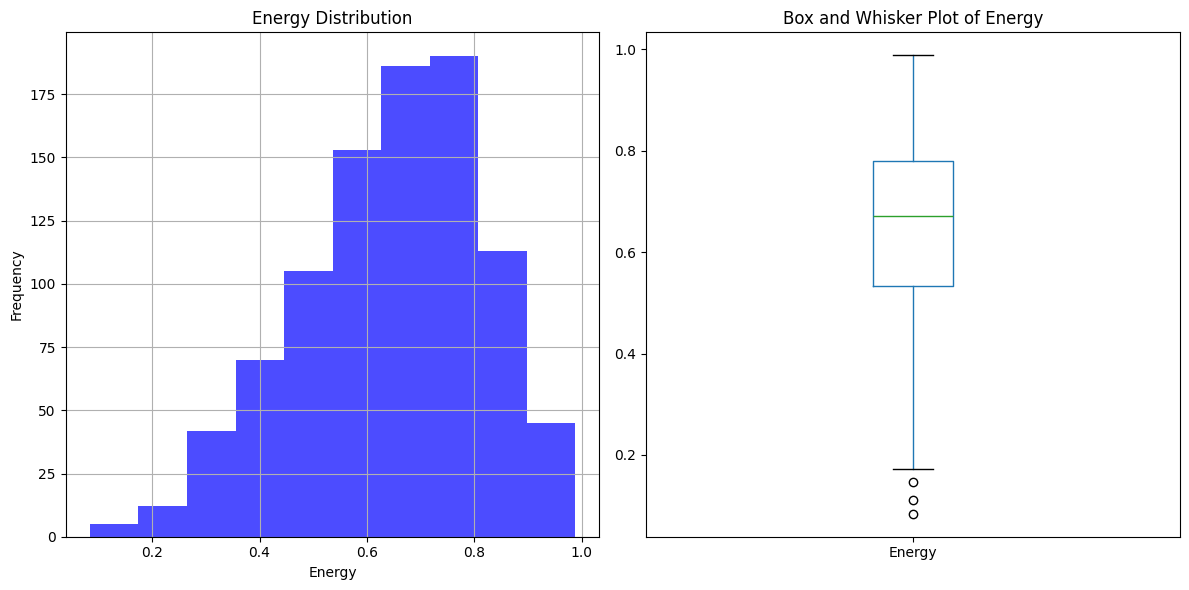

Outliers:
145    0.111
510    0.147
912    0.084
Name: Energy, dtype: float64


In [46]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df['Energy'].hist(bins=10, color='blue', alpha=0.7)
plt.title('Energy Distribution')
plt.xlabel('Energy')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df.boxplot(column='Energy', grid=False)
plt.title('Box and Whisker Plot of Energy')

plt.tight_layout() 
plt.show()

Q1 = df['Energy'].quantile(0.25)
Q3 = df['Energy'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(full['Energy'] < (Q1 - 1.5 * IQR)) | (full['Energy'] > (Q3 + 1.5 * IQR))]
print(f"Outliers:\n{outliers['Energy']}")


In [47]:
# Identify outliers using the IQR method
outliers = df[(df['Energy'] < (Q1 - 1.5 * IQR)) | (df['Energy'] > (Q3 + 1.5 * IQR))]

# Save the outliers in a new DataFrame, including their original indices
outliers_df = outliers.reset_index(drop=True)
print("Outliers with all columns:\n", outliers_df)

# If you want to save the indices of the outliers as well
outlier_indices = outliers.index.tolist()
print("Indices of outliers:", outlier_indices)
df = df[(df['Energy'] >= (Q1 - 1.5 * IQR)) & (df['Energy'] <= (Q3 + 1.5 * IQR))]


Outliers with all columns:
                                                Title             Author  \
0                              when the party's over      Billie Eilish   
1                                      Say Something  A Great Big World   
2  What Was I Made For? [From The Motion Picture ...      Billie Eilish   

     Year                                              Genre  Energy  \
0  2019.0                                 ['art pop', 'pop']   0.111   
1  2014.0  ['neo mellow', 'piano rock', 'pop rock', 'vira...   0.147   
2  2023.0                                 ['art pop', 'pop']   0.084   

   Liveness    Tempo  Speechiness  Acousticness  Instrumentalness  \
0    0.0897   82.642       0.0972         0.978          0.000040   
1    0.0913  141.284       0.0355         0.857          0.000003   
2    0.0983   79.449       0.0317         0.953          0.000000   

   Time_signature  Danceability  Key  Duration_ms  Loudness  Valence  Mode  
0             4.0         0.

In [48]:
import re

In [49]:
# Apply regex to the 'title' column and extract only the main title
cleaned_title = df['Title'].apply(lambda x: re.match(r'^[^-\(]+', x).group().strip())

# Display the new column with cleaned titles
print(cleaned_title)

0         Blinding Lights
1            Shape of You
2       Someone You Loved
3               As It Was
4               Sunflower
              ...        
916      Good Luck, Babe!
917            A Bar Song
918    BIRDS OF A FEATHER
919      End of Beginning
920               Bound 2
Name: Title, Length: 918, dtype: object
